# Exam 1 - From Raw Data to Useful Data

## Learning Objectives

Upon finishing this exam, you will be able to:
1.  Apply Data Integration skills, and collect data from multiple variate sources
1.  Apply Data Manipulation skills, and integrate data into a uniform dataframe
1.  Apply Data Understanding skills, and describe the data in statistics
1.  Apply Data Visualization skills, and communicate the data in graphic approach
1.  Apply Data Preprocessinng skills, and reduce, normalize, and discretize the data as necessary
1.  Apply your learning skills, and deal with tasks without given tutorials
1.  Apply your domain knowledge, to choose appropriate methods based on your judgement.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Question 1: Data Integration (15 points)

You are given with 4 files and they are in this project. You first should read them from the source, and save them to pandas dataframes.

### Read CSV
Read the csv file and save it to a dataframe `df_student_record_others`

In [2]:
df_student_records_others = pd.read_csv('Student_Record_Others.csv')
df_student_records_others.head()

,id,name,major,gender,academic,campus,internship,AtRisk,graduate_program,goverment,industry,placement,annual
0,CUB0000,Lisa Tucker,Electric Engineering,M,140.40,4,4,1,0.095158,0.120676,0.195053,0.410887,44384.842252
1,CUB0001,Diana Lopez,Computer Science,M,178.45,4,13,1,0.623424,0.322178,0.535255,1.480858,136786.533445
2,CUB0002,Angela Huber,Electric Engineering,M,140.15,2,6,1,0.083423,0.063620,0.222370,0.369413,NaN
3,CUB0003,Nicholas Steele,Information Science,M,176.25,17,16,0,0.769059,0.797730,0.778017,2.344805,243255.134630
4,CUB0004,Deborah Porter,Computer Science,M,148.50,7,2,1,0.214019,0.241057,0.200903,0.655979,51483.725756


### Read JSON
Read the json file and save it to a dataframe `df_student_record_courses_p1`

In [3]:
df_student_record_courses_p1 = pd.read_json('P1-Student_Record_Courses.json')
df_student_record_courses_p1.head()

,id,c01,c02,c03,c04,c05,c06,c07,c08,c09,c10,elective
0,CUB0000,168.0,136.0,122.0,124.0,147.0,NaN,108.0,122.0,151.0,177.0,['Statistical_Modeling' 'Data_Mining' 'Stats_f...
1,CUB0001,226.5,156.0,124.0,161.0,220.0,217.0,149.0,132.0,177.0,222.0,['Data_Science_Methods' 'Deep_Learning' 'Stats...
2,CUB0002,157.5,134.0,134.0,NaN,144.0,138.0,105.0,128.0,157.0,179.0,['Data_Mining' 'Datacenter_Computing' 'Databas...
3,CUB0003,193.5,161.0,166.0,209.0,254.0,168.0,117.0,134.0,201.0,159.0,['Python_for_Data_Science' 'Text_Marketing_Ana...
4,CUB0004,180.0,138.0,NaN,131.0,171.0,163.0,124.0,125.0,149.0,186.0,['Statistical_Learning' 'Statistical_Inference...


### Read Sqlite
Read the sqlite file and save it to a dataframe `df_student_record_courses_p2`

In [4]:
import sqlite3
connect = sqlite3.connect('P2-Student_Record_Courses.sqlite')
cursor = connect.cursor()

query = '''SELECT * FROM sqlite_master WHERE type = 'table';'''

cursor.execute(query)
results = cursor.fetchall()
results

[('table',
  'P2-Student_Record_Courses',
  'P2-Student_Record_Courses',
  2,
  'CREATE TABLE `P2-Student_Record_Courses` (`stu_id`, `c01`, `c02`, `c03`, `c04`, `c05`, `c06`, `c07`, `c08`, `c09`, `c10`, `elective`)')]

In [5]:
query = '''SELECT * FROM 'P2-Student_Record_Courses';'''

cursor.execute(query)
results = cursor.fetchall()
results

df_student_record_courses_p2 = pd.DataFrame(results,columns=df_student_record_courses_p1.columns)

In [6]:
df_student_record_courses_p2.head()

,id,c01,c02,c03,c04,c05,c06,c07,c08,c09,c10,elective
0,CUB1000,207.0,165.0,150.0,157.0,195.0,189.0,134.0,149.0,192.0,214.0,['Effective_Communication' 'Datacenter_Computi...
1,CUB1001,187.5,140.0,129.0,143.0,180.0,169.0,123.0,124.0,165.0,197.0,['High_Performance_and_Parallel_Computing' 'St...
2,CUB1002,210.0,136.0,111.0,139.0,190.0,,140.0,125.0,145.0,196.0,['Data_Structures_and_Algorithms' 'R_for_Data_...
3,CUB1003,219.0,147.0,124.0,,199.0,183.0,143.0,131.0,171.0,209.0,['High_Performance_and_Parallel_Computing'\n '...
4,CUB1004,219.0,159.0,,210.0,272.0,195.0,136.0,126.0,180.0,161.0,['Statistical_Modeling' 'Data_Mining' 'Data_Sc...


### Read HTML
Read the html file and save it to a dataframe `df_student_record_courses_p3`. Hint: You may use the `read_html` function in pandas directly.

In [7]:
# pd.read_html() returns a list of dfs
p3 = pd.read_html('P3-Student_Record_Courses.html')[0] 
p3

,0,1,2,3,4,5,6,7,8,9,10,11
0,sid,c01,c02,c03,c04,c05,c06,c07,c08,c09,c10,elective
1,CUB2000,205.5,138.0,118.0,144.0,181.0,167.0,124.0,121.0,163.0,194.0,['R_for_Data_Science' 'Python_for_Data_Science...
2,CUB2001,201.0,159.0,152.0,201.0,238.0,178.0,118.0,131.0,195.0,169.0,['Vital_Skills_for_Data_Scientists' 'R_for_Dat...
3,CUB2002,193.5,129.0,108.0,134.0,177.0,166.0,128.0,114.0,158.0,201.0,['Data_Science_Methods' 'Data_Structures_and_A...
4,CUB2003,211.5,147.0,126.0,138.0,185.0,181.0,123.0,118.0,188.0,226.0,['Stats_for_Data_Science' 'Data_Science_Method...
...,...,...,...,...,...,...,...,...,...,...,...,...
996,CUB2995,211.5,160.0,NaN,190.0,249.0,192.0,142.0,145.0,168.0,163.0,['Nature_Language_Processing' 'Datacenter_Comp...
997,CUB2996,183.0,149.0,139.0,142.0,174.0,170.0,114.0,131.0,176.0,198.0,['Deep_Learning' 'Effective_Communication' 'D...
998,CUB2997,202.5,151.0,NaN,178.0,236.0,169.0,136.0,139.0,158.0,152.0,['Statistical_Inference' 'Stats_for_Data_Scien...
999,CUB2998,211.5,139.0,135.0,146.0,186.0,181.0,116.0,109.0,180.0,210.0,['Neural_Networks' 'Effective_Communication' '...


In [8]:
# data cleaning
'''
for some reason the column names got read in as the first row of the df, so going to do some preliminary 
data cleaning so that column names match the rest of the p1-p3 dfs
'''
df_student_record_courses_p3 = p3.rename(columns=p3.iloc[0]).loc[1:]
df_student_record_courses_p3 = df_student_record_courses_p3.rename(columns={'sid':'id'})
df_student_record_courses_p3.head()

,id,c01,c02,c03,c04,c05,c06,c07,c08,c09,c10,elective
1,CUB2000,205.5,138.0,118.0,144.0,181.0,167.0,124.0,121.0,163.0,194.0,['R_for_Data_Science' 'Python_for_Data_Science...
2,CUB2001,201.0,159.0,152.0,201.0,238.0,178.0,118.0,131.0,195.0,169.0,['Vital_Skills_for_Data_Scientists' 'R_for_Dat...
3,CUB2002,193.5,129.0,108.0,134.0,177.0,166.0,128.0,114.0,158.0,201.0,['Data_Science_Methods' 'Data_Structures_and_A...
4,CUB2003,211.5,147.0,126.0,138.0,185.0,181.0,123.0,118.0,188.0,226.0,['Stats_for_Data_Science' 'Data_Science_Method...
5,CUB2004,193.5,162.0,159.0,206.0,NaN,175.0,121.0,135.0,191.0,157.0,['Effective_Communication' 'Statistical_Modeli...


### Reasoning
Answer following questions using one or two sentences.
1.  Is there any difficulty you met in finishing this question? If yes, how did you solve it?
1.  If you were told to integrate data from multiple sources, what difficuties you would expect?

> Answer to 1: I still haven't gotten used to reading data from SQL, so I had some difficulties reading that data in. I had to re-read the SQL DeepNote tutorial to help read in the information. I couldn't figure out how to get the column names from the sqlite data table, so I just used the column names from the `df_student_record_courses_p1` columns (because I knew they matched, but that wasn't exactly a long-term solution). 

> Answer to 2: If I had to integrate data from multiple sources, I would expect to encounter dealing with different data formats like this. Although, this was probably the most optimal situation where all columns were the same. (So for instance, I  probably wouldn't have been able to reuse the same column names as p1 for p2.  

## Question 2: Data Manipulation (15 points)
You are now having four dataframes, and you should integrate them as one dataframe for further processing.

### Integrate Parts
Integrate your dataframes `df_student_record_courses_p1`, `df_student_record_courses_p2`, and `df_student_record_courses_p3`to a dataframe `df_student_record_courses`

In [9]:
df_student_record_courses = pd.concat([df_student_record_courses_p1,df_student_record_courses_p2,
                                        df_student_record_courses_p3])

df_student_record_courses

,id,c01,c02,c03,c04,c05,c06,c07,c08,c09,c10,elective
0,CUB0000,168.0,136.0,122.0,124.0,147.0,NaN,108.0,122.0,151.0,177.0,['Statistical_Modeling' 'Data_Mining' 'Stats_f...
1,CUB0001,226.5,156.0,124.0,161.0,220.0,217.0,149.0,132.0,177.0,222.0,['Data_Science_Methods' 'Deep_Learning' 'Stats...
2,CUB0002,157.5,134.0,134.0,NaN,144.0,138.0,105.0,128.0,157.0,179.0,['Data_Mining' 'Datacenter_Computing' 'Databas...
3,CUB0003,193.5,161.0,166.0,209.0,254.0,168.0,117.0,134.0,201.0,159.0,['Python_for_Data_Science' 'Text_Marketing_Ana...
4,CUB0004,180.0,138.0,NaN,131.0,171.0,163.0,124.0,125.0,149.0,186.0,['Statistical_Learning' 'Statistical_Inference...
...,...,...,...,...,...,...,...,...,...,...,...,...
996,CUB2995,211.5,160.0,NaN,190.0,249.0,192.0,142.0,145.0,168.0,163.0,['Nature_Language_Processing' 'Datacenter_Comp...
997,CUB2996,183.0,149.0,139.0,142.0,174.0,170.0,114.0,131.0,176.0,198.0,['Deep_Learning' 'Effective_Communication' 'D...
998,CUB2997,202.5,151.0,NaN,178.0,236.0,169.0,136.0,139.0,158.0,152.0,['Statistical_Inference' 'Stats_for_Data_Scien...
999,CUB2998,211.5,139.0,135.0,146.0,186.0,181.0,116.0,109.0,180.0,210.0,['Neural_Networks' 'Effective_Communication' '...


### Integrate All
Integrate your dataframes `df_student_record_courses` and `df_student_record_others`, and name it as `df_student_record`

In [10]:
df_student_record = pd.merge(df_student_records_others,df_student_record_courses,how='left',on='id')
df_student_record

,id,name,major,gender,academic,campus,internship,AtRisk,graduate_program,goverment,...,c02,c03,c04,c05,c06,c07,c08,c09,c10,elective
0,CUB0000,Lisa Tucker,Electric Engineering,M,140.40,4,4,1,0.095158,0.120676,...,136.0,122.0,124.0,147.0,NaN,108.0,122.0,151.0,177.0,['Statistical_Modeling' 'Data_Mining' 'Stats_f...
1,CUB0001,Diana Lopez,Computer Science,M,178.45,4,13,1,0.623424,0.322178,...,156.0,124.0,161.0,220.0,217.0,149.0,132.0,177.0,222.0,['Data_Science_Methods' 'Deep_Learning' 'Stats...
2,CUB0002,Angela Huber,Electric Engineering,M,140.15,2,6,1,0.083423,0.063620,...,134.0,134.0,NaN,144.0,138.0,105.0,128.0,157.0,179.0,['Data_Mining' 'Datacenter_Computing' 'Databas...
3,CUB0003,Nicholas Steele,Information Science,M,176.25,17,16,0,0.769059,0.797730,...,161.0,166.0,209.0,254.0,168.0,117.0,134.0,201.0,159.0,['Python_for_Data_Science' 'Text_Marketing_Ana...
4,CUB0004,Deborah Porter,Computer Science,M,148.50,7,2,1,0.214019,0.241057,...,138.0,NaN,131.0,171.0,163.0,124.0,125.0,149.0,186.0,['Statistical_Learning' 'Statistical_Inference...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,CUB2995,Ricardo Gallegos,Others,M,176.25,13,9,0,0.671989,0.604092,...,160.0,NaN,190.0,249.0,192.0,142.0,145.0,168.0,163.0,['Nature_Language_Processing' 'Datacenter_Comp...
2996,CUB2996,Meagan Baird,Electric Engineering,M,157.60,6,16,0,0.414592,0.341335,...,149.0,139.0,142.0,174.0,170.0,114.0,131.0,176.0,198.0,['Deep_Learning' 'Effective_Communication' 'D...
2997,CUB2997,Stephanie Duncan,Others,F,165.15,17,4,0,0.547043,0.669662,...,151.0,NaN,178.0,236.0,169.0,136.0,139.0,158.0,152.0,['Statistical_Inference' 'Stats_for_Data_Scien...
2998,CUB2998,David Stevens,Mathmatics,F,161.35,4,12,1,0.408073,0.254124,...,139.0,135.0,146.0,186.0,181.0,116.0,109.0,180.0,210.0,['Neural_Networks' 'Effective_Communication' '...


### Assertions
After the integration, make sure your dataframe is having correct index and appropriate data type

In [11]:
# because I left-joined the dataframes technically the index should be fine
# (only concating reuses indices thus messing up overall index)
# but it doesn't hurt to reset anyway

df_student_record.reset_index(drop=True,inplace=True)
df_student_record

,id,name,major,gender,academic,campus,internship,AtRisk,graduate_program,goverment,...,c02,c03,c04,c05,c06,c07,c08,c09,c10,elective
0,CUB0000,Lisa Tucker,Electric Engineering,M,140.40,4,4,1,0.095158,0.120676,...,136.0,122.0,124.0,147.0,NaN,108.0,122.0,151.0,177.0,['Statistical_Modeling' 'Data_Mining' 'Stats_f...
1,CUB0001,Diana Lopez,Computer Science,M,178.45,4,13,1,0.623424,0.322178,...,156.0,124.0,161.0,220.0,217.0,149.0,132.0,177.0,222.0,['Data_Science_Methods' 'Deep_Learning' 'Stats...
2,CUB0002,Angela Huber,Electric Engineering,M,140.15,2,6,1,0.083423,0.063620,...,134.0,134.0,NaN,144.0,138.0,105.0,128.0,157.0,179.0,['Data_Mining' 'Datacenter_Computing' 'Databas...
3,CUB0003,Nicholas Steele,Information Science,M,176.25,17,16,0,0.769059,0.797730,...,161.0,166.0,209.0,254.0,168.0,117.0,134.0,201.0,159.0,['Python_for_Data_Science' 'Text_Marketing_Ana...
4,CUB0004,Deborah Porter,Computer Science,M,148.50,7,2,1,0.214019,0.241057,...,138.0,NaN,131.0,171.0,163.0,124.0,125.0,149.0,186.0,['Statistical_Learning' 'Statistical_Inference...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,CUB2995,Ricardo Gallegos,Others,M,176.25,13,9,0,0.671989,0.604092,...,160.0,NaN,190.0,249.0,192.0,142.0,145.0,168.0,163.0,['Nature_Language_Processing' 'Datacenter_Comp...
2996,CUB2996,Meagan Baird,Electric Engineering,M,157.60,6,16,0,0.414592,0.341335,...,149.0,139.0,142.0,174.0,170.0,114.0,131.0,176.0,198.0,['Deep_Learning' 'Effective_Communication' 'D...
2997,CUB2997,Stephanie Duncan,Others,F,165.15,17,4,0,0.547043,0.669662,...,151.0,NaN,178.0,236.0,169.0,136.0,139.0,158.0,152.0,['Statistical_Inference' 'Stats_for_Data_Scien...
2998,CUB2998,David Stevens,Mathmatics,F,161.35,4,12,1,0.408073,0.254124,...,139.0,135.0,146.0,186.0,181.0,116.0,109.0,180.0,210.0,['Neural_Networks' 'Effective_Communication' '...


In [12]:
df_student_record.dtypes

id                   object
name                 object
major                object
gender               object
academic            float64
campus                int64
internship            int64
AtRisk                int64
graduate_program    float64
goverment           float64
industry            float64
placement           float64
annual              float64
c01                  object
c02                  object
c03                  object
c04                  object
c05                  object
c06                  object
c07                  object
c08                  object
c09                  object
c10                  object
elective             object
dtype: object

In [13]:
cols = ['c01','c02','c03','c04','c05','c06','c07','c08','c09','c10']
df_student_record[cols] = df_student_record[cols].apply(pd.to_numeric)

df_student_record.dtypes

id                   object
name                 object
major                object
gender               object
academic            float64
campus                int64
internship            int64
AtRisk                int64
graduate_program    float64
goverment           float64
industry            float64
placement           float64
annual              float64
c01                 float64
c02                 float64
c03                 float64
c04                 float64
c05                 float64
c06                 float64
c07                 float64
c08                 float64
c09                 float64
c10                 float64
elective             object
dtype: object

In [14]:
df_student_record

,id,name,major,gender,academic,campus,internship,AtRisk,graduate_program,goverment,...,c02,c03,c04,c05,c06,c07,c08,c09,c10,elective
0,CUB0000,Lisa Tucker,Electric Engineering,M,140.40,4,4,1,0.095158,0.120676,...,136.0,122.0,124.0,147.0,NaN,108.0,122.0,151.0,177.0,['Statistical_Modeling' 'Data_Mining' 'Stats_f...
1,CUB0001,Diana Lopez,Computer Science,M,178.45,4,13,1,0.623424,0.322178,...,156.0,124.0,161.0,220.0,217.0,149.0,132.0,177.0,222.0,['Data_Science_Methods' 'Deep_Learning' 'Stats...
2,CUB0002,Angela Huber,Electric Engineering,M,140.15,2,6,1,0.083423,0.063620,...,134.0,134.0,NaN,144.0,138.0,105.0,128.0,157.0,179.0,['Data_Mining' 'Datacenter_Computing' 'Databas...
3,CUB0003,Nicholas Steele,Information Science,M,176.25,17,16,0,0.769059,0.797730,...,161.0,166.0,209.0,254.0,168.0,117.0,134.0,201.0,159.0,['Python_for_Data_Science' 'Text_Marketing_Ana...
4,CUB0004,Deborah Porter,Computer Science,M,148.50,7,2,1,0.214019,0.241057,...,138.0,NaN,131.0,171.0,163.0,124.0,125.0,149.0,186.0,['Statistical_Learning' 'Statistical_Inference...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,CUB2995,Ricardo Gallegos,Others,M,176.25,13,9,0,0.671989,0.604092,...,160.0,NaN,190.0,249.0,192.0,142.0,145.0,168.0,163.0,['Nature_Language_Processing' 'Datacenter_Comp...
2996,CUB2996,Meagan Baird,Electric Engineering,M,157.60,6,16,0,0.414592,0.341335,...,149.0,139.0,142.0,174.0,170.0,114.0,131.0,176.0,198.0,['Deep_Learning' 'Effective_Communication' 'D...
2997,CUB2997,Stephanie Duncan,Others,F,165.15,17,4,0,0.547043,0.669662,...,151.0,NaN,178.0,236.0,169.0,136.0,139.0,158.0,152.0,['Statistical_Inference' 'Stats_for_Data_Scien...
2998,CUB2998,David Stevens,Mathmatics,F,161.35,4,12,1,0.408073,0.254124,...,139.0,135.0,146.0,186.0,181.0,116.0,109.0,180.0,210.0,['Neural_Networks' 'Effective_Communication' '...


### Reasoning
Answer following questions using one or two sentences.
1.  Is there any difficulty you met in finishing this question? If yes, how did you solve it?

> JK answer: I have quite a bit of experience with concatenating and merging data frames, so I did not encounter many difficulties in this problem

## Question 3: Data Understanding (15 points)
Continue with `df_student_record`. You are having one dataframe. It is the time to dicpit your data with statsitsics

### A Big Picture
Show the major characteristics of your data, such as # of objects, # of attributes, # of null values etc.

In [15]:
df_student_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3000 non-null   object 
 1   name              3000 non-null   object 
 2   major             3000 non-null   object 
 3   gender            3000 non-null   object 
 4   academic          3000 non-null   float64
 5   campus            3000 non-null   int64  
 6   internship        3000 non-null   int64  
 7   AtRisk            3000 non-null   int64  
 8   graduate_program  3000 non-null   float64
 9   goverment         3000 non-null   float64
 10  industry          3000 non-null   float64
 11  placement         3000 non-null   float64
 12  annual            2852 non-null   float64
 13  c01               2841 non-null   float64
 14  c02               2848 non-null   float64
 15  c03               2864 non-null   float64
 16  c04               2861 non-null   float64


### Central Tendency
Show the statistics related to Central Tendency of *FIVE* columns

In [16]:
# central tendencies = mean, median, mode, midrange
ct5 = ['academic','c01','c02','c03','c04']
def getCentral(df,col):
    mn = df[col].min()
    mx = df[col].max()
    avg = df[col].mean()
    med = df[col].median()
    mode = df[col].mode().iloc[0]
    mid = (mx-mn)/2
    central = pd.concat([mn,mx,avg,med,mode,mid],axis=1)
    central.columns = ['Min','Max','Mean','Median','Mode','Mid-range']
    return central

In [17]:
getCentral(df_student_record,ct5)

,Min,Max,Mean,Median,Mode,Mid-range
academic,133.05,189.95,161.981400,161.85,154.1,28.45
c01,154.50,247.50,200.346885,201.00,193.5,46.50
c02,120.00,173.00,146.357444,146.00,146.0,26.50
c03,93.00,172.00,128.698324,128.00,131.0,39.50
c04,115.00,218.00,157.319119,150.00,137.0,51.50


### Dispersion
Show the statistics related to Dispersion of *ANOTHER FIVE* columns

In [18]:
dsp5 = ['internship','c05','c06','c07','c08','c09']

def getDispersion(df,col):
    rng = df[col].max() - df[col].min()
    quantiles = df[col].quantile([0.25,0.5,0.75])
    IQR = quantiles.loc[0.75] - quantiles.loc[0.25]
    var = df[col].var()
    std = df[col].std()
    disp = pd.concat([rng,quantiles.transpose(),IQR,var,std],axis=1)
    disp.columns = ['Range','Q1','Q2','Q3','IQR','Variance','Standard Dev']
    return disp

In [19]:
getDispersion(df_student_record,dsp5)

,Range,Q1,Q2,Q3,IQR,Variance,Standard Dev
internship,25.0,6.0,10.0,14.0,8.0,28.524080,5.340794
c05,137.0,178.0,193.0,224.0,46.0,897.901529,29.965005
c06,88.0,163.0,175.5,189.0,26.0,315.510597,17.762618
c07,58.0,119.0,126.0,134.0,15.0,111.570709,10.562704
c08,54.0,119.0,126.0,133.0,14.0,102.481903,10.123335
c09,79.0,160.0,170.0,180.0,20.0,203.985492,14.282349


### Correlation
Show the correlation among all numeric attributes

In [20]:
correlation = df_student_record.corr()
correlation

,academic,campus,internship,AtRisk,graduate_program,goverment,industry,placement,annual,c01,c02,c03,c04,c05,c06,c07,c08,c09,c10
academic,1.000000,0.144321,0.755635,-0.277774,0.931932,0.431891,0.832214,0.775286,0.789714,0.773860,0.909874,0.650760,0.595865,0.636594,0.775807,0.614708,0.559077,0.680667,0.177166
campus,0.144321,1.000000,-0.125568,-0.423838,0.468308,0.948531,0.361034,0.683059,0.465646,-0.251280,0.101395,0.186972,0.778437,0.779981,-0.291089,-0.131108,-0.155055,0.145255,-0.798558
internship,0.755635,-0.125568,1.000000,-0.232140,0.705454,0.179238,0.875268,0.605545,0.724326,0.611062,0.735718,0.530066,0.345596,0.361245,0.698427,0.428814,0.478682,0.509892,0.239565
AtRisk,-0.277774,-0.423838,-0.232140,1.000000,-0.414576,-0.487262,-0.418756,-0.487163,-0.434158,-0.139835,-0.200660,-0.147498,-0.346268,-0.380024,-0.099400,-0.154137,-0.048926,-0.205859,0.152535
graduate_program,0.931932,0.468308,0.705454,-0.414576,1.000000,0.718824,0.923981,0.951351,0.903256,0.584897,0.847582,0.652257,0.805147,0.836817,0.588109,0.478070,0.441319,0.650492,-0.134734
goverment,0.431891,0.948531,0.179238,-0.487262,0.718824,1.000000,0.630696,0.879172,0.697217,-0.004739,0.373292,0.375965,0.895063,0.905404,-0.028204,0.050178,0.029052,0.336724,-0.683735
industry,0.832214,0.361034,0.875268,-0.418756,0.923981,0.630696,1.000000,0.913481,0.917347,0.505412,0.783880,0.615024,0.716521,0.734814,0.559267,0.385363,0.407786,0.582295,-0.128898
placement,0.775286,0.683059,0.605545,-0.487163,0.951351,0.879172,0.913481,1.000000,0.907873,0.363235,0.706042,0.585207,0.892116,0.912898,0.371634,0.310356,0.297206,0.556089,-0.379692
annual,0.789714,0.465646,0.724326,-0.434158,0.903256,0.697217,0.917347,0.907873,1.000000,0.441303,0.733404,0.588152,0.756571,0.777838,0.474002,0.345007,0.352720,0.567645,-0.203673
c01,0.773860,-0.251280,0.611062,-0.139835,0.584897,-0.004739,0.505412,0.363235,0.441303,1.000000,0.564795,0.215960,0.075806,0.217540,0.871874,0.723234,0.318777,0.405265,0.589208


### Reasoning
Answer following questions using one or two sentences.
1.  Is there any difficulty you met in finishing this question? If yes, how did you solve it?
1.  Research **skewed normal distribution**, and identify ONE attribute that is *left skewed*, ONE attribute that is *right skewed*, and ONE attribute that is *no skew*.
1.  Identify ONE pair of attributes that have high positive correlation, and explain your hypothesis of the reason.
1.  Identify ONE pair of attributes that have high negative correlation, and explain your hypothesis of the reason.

> Answer to 1: No particular difficulties to note encountered in this problem (used similar methods as HW2)

> Answer to 2: 

> Answer to 3: 'c04' and 'c05' appeared to have a strong positive correlation because they had a correlation coefficient of +0.94. And any correlation coefficient close to +1.0 has a strong positive correlation.

> Answer to 4: 'campus' and 'c10' appeared to have a strong negative correlation because they had a correlation coefficient of -0.80. And any correlation coefficient close to -1.0 has a strong negative correlation.

## Question 4: Data Visualization (25 points)

### Relational Plots
Visualize the relationship of *FIVE* pair of attributes. You should try appropriate and various relational plots with different choice of pairs.

<Figure size 640x480 with 0 Axes>

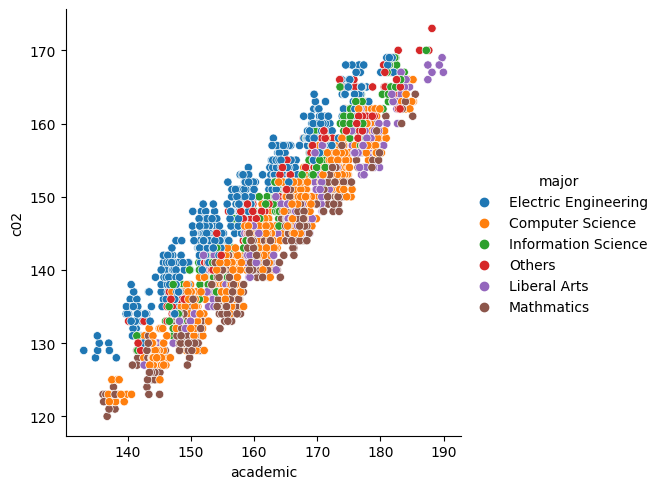

<Figure size 640x480 with 0 Axes>

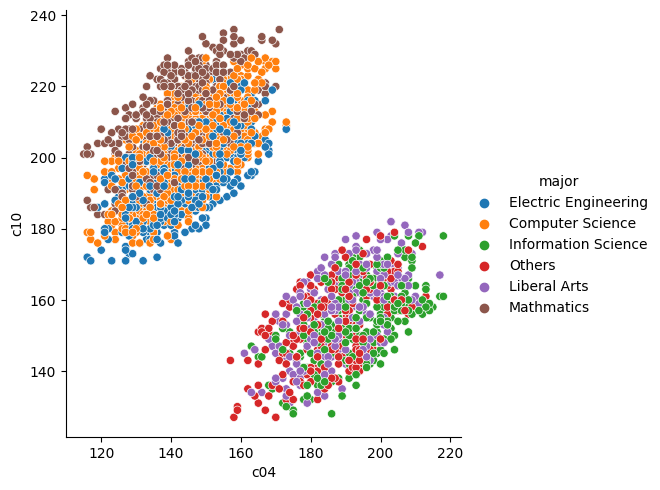

<Figure size 640x480 with 0 Axes>

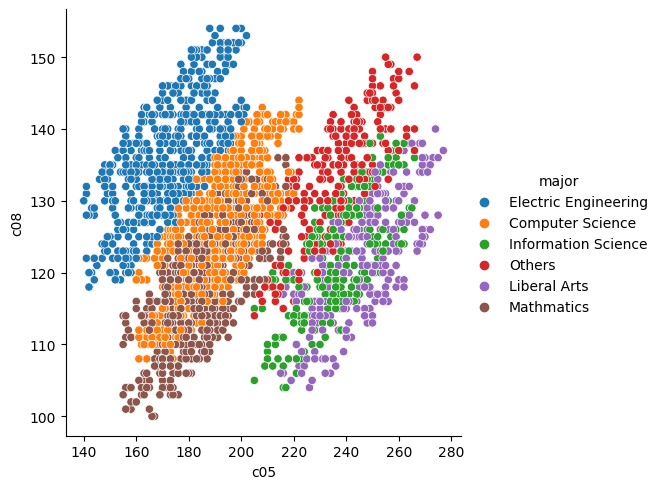

<Figure size 640x480 with 0 Axes>

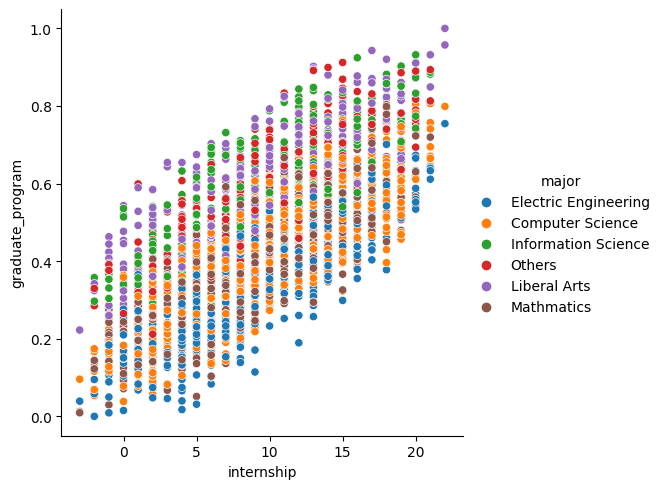

<Figure size 640x480 with 0 Axes>

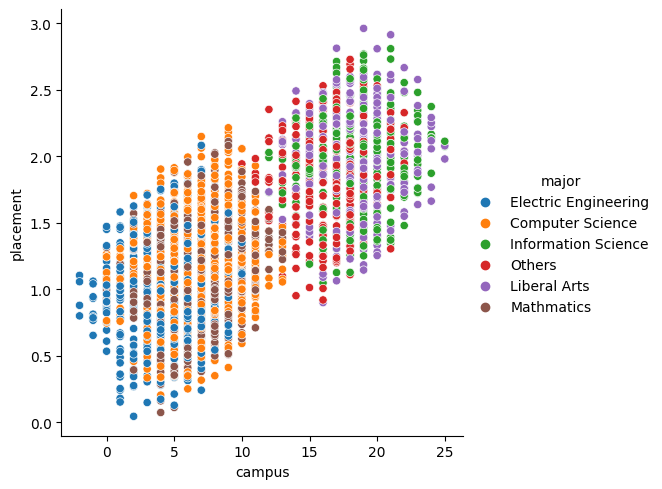

In [21]:
rel_pairs = [['academic','c02'],['c04','c10'],['c05','c08'],['internship','graduate_program'],
        ['campus','placement']]

for pair in rel_pairs:
    fig = plt.figure()
    sns.relplot(data=df_student_record, x = pair[0],y=pair[1],hue='major')

### Distributional Plots
Visualize the distribution of *FIVE* attributes. You should try appropriate and various distributional plots with different choice of attributes.

<Figure size 640x480 with 0 Axes>

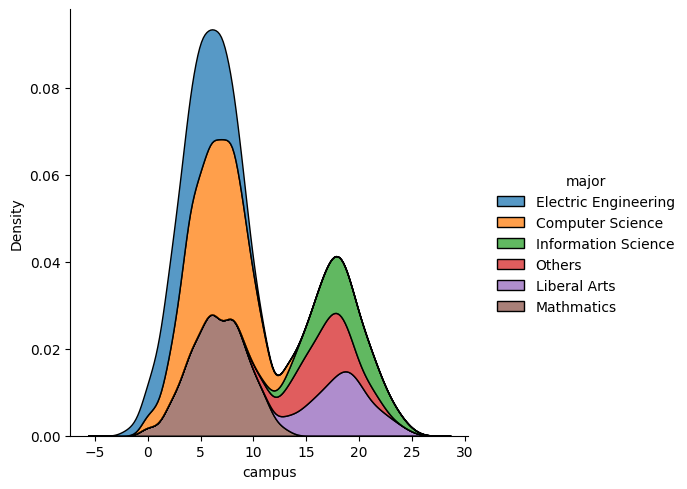

<Figure size 640x480 with 0 Axes>

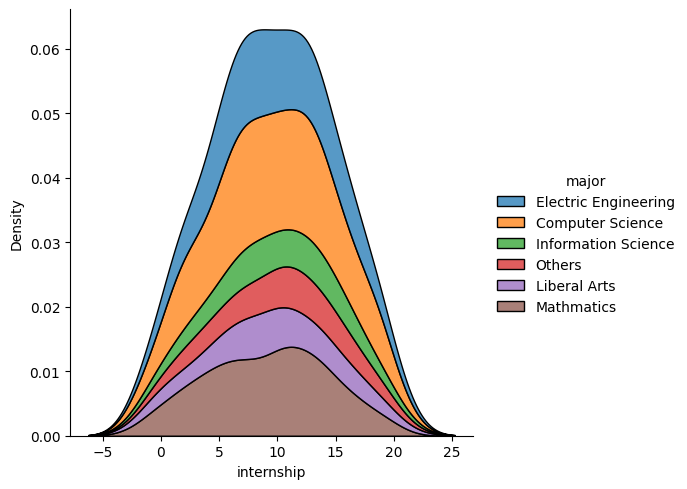

<Figure size 640x480 with 0 Axes>

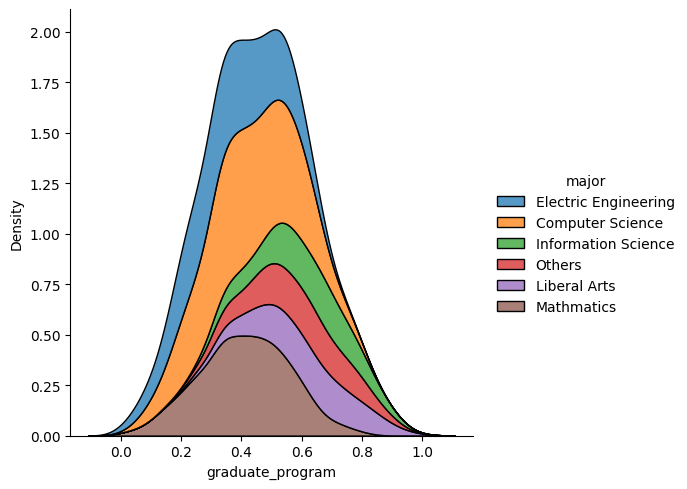

<Figure size 640x480 with 0 Axes>

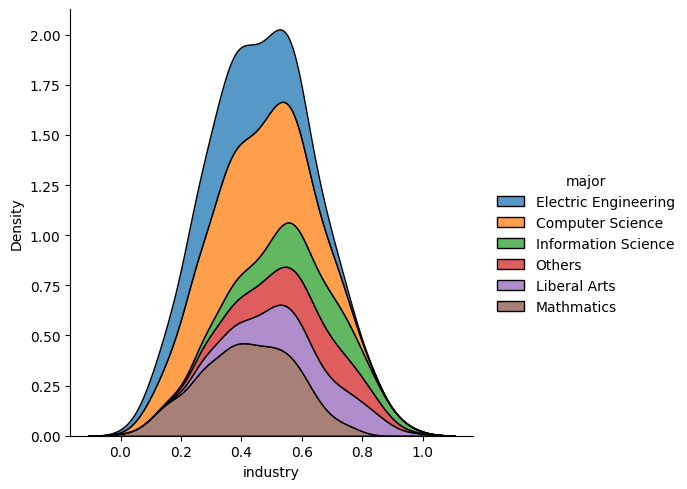

<Figure size 640x480 with 0 Axes>

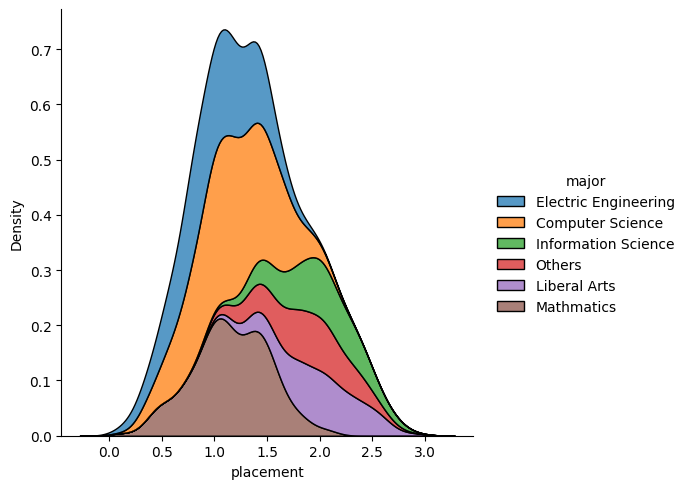

In [22]:
dis_att = ['campus','internship','graduate_program','industry','placement']
for att in dis_att:
    fig = plt.figure()
    sns.displot(data=df_student_record,x = att,hue='major',kind='kde',multiple='stack')

### Categorical Plots
Visualize the plots of *TWO* categorical attributes. You should try appropriate plots with different choice of attributes.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Electric Engineering'),
  Text(1, 0, 'Computer Science'),
  Text(2, 0, 'Information Science'),
  Text(3, 0, 'Others'),
  Text(4, 0, 'Liberal Arts'),
  Text(5, 0, 'Mathmatics')])

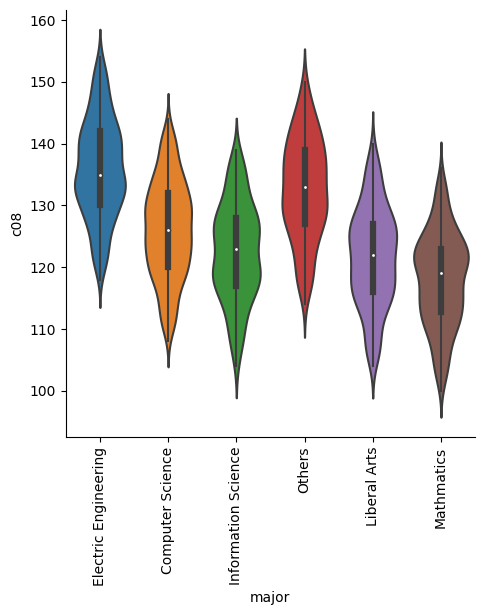

In [23]:
sns.catplot(data=df_student_record,x='major',y='c08',kind='violin')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Electric Engineering'),
  Text(1, 0, 'Computer Science'),
  Text(2, 0, 'Information Science'),
  Text(3, 0, 'Others'),
  Text(4, 0, 'Liberal Arts'),
  Text(5, 0, 'Mathmatics')])

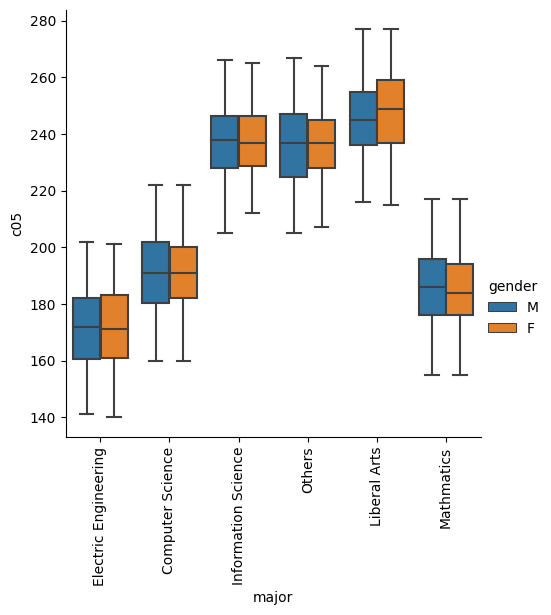

In [24]:
sns.catplot(data=df_student_record,x='major',y='c05',kind='box',hue='gender')
plt.xticks(rotation=90)

### HeatMap
Visualize the correlation of all numeric attributes

<AxesSubplot: >

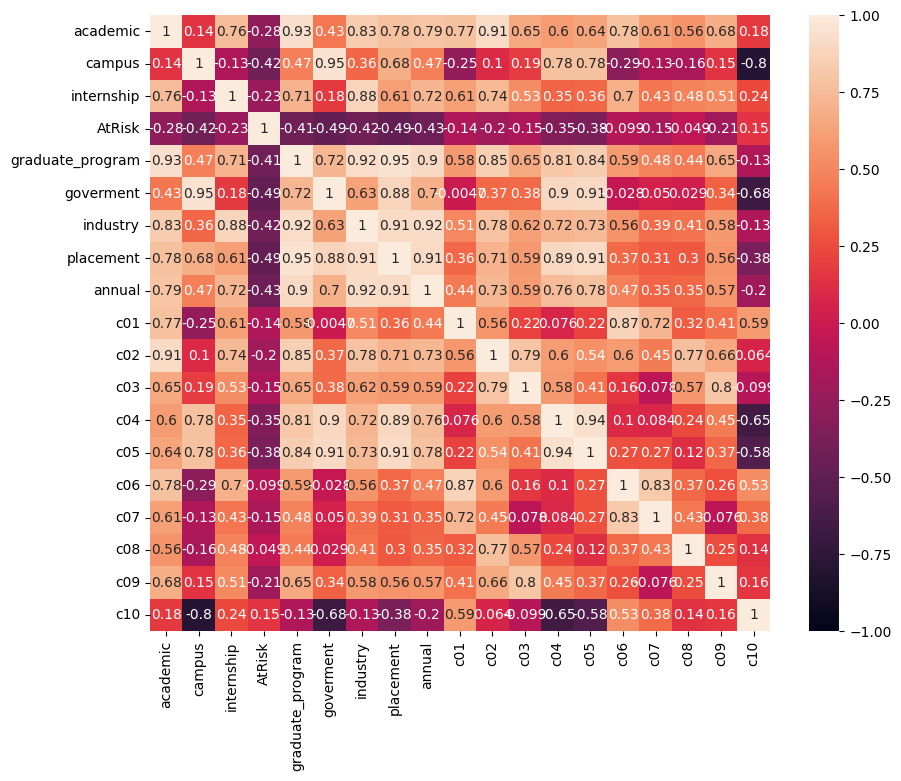

In [25]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,vmin=-1)

<AxesSubplot: >

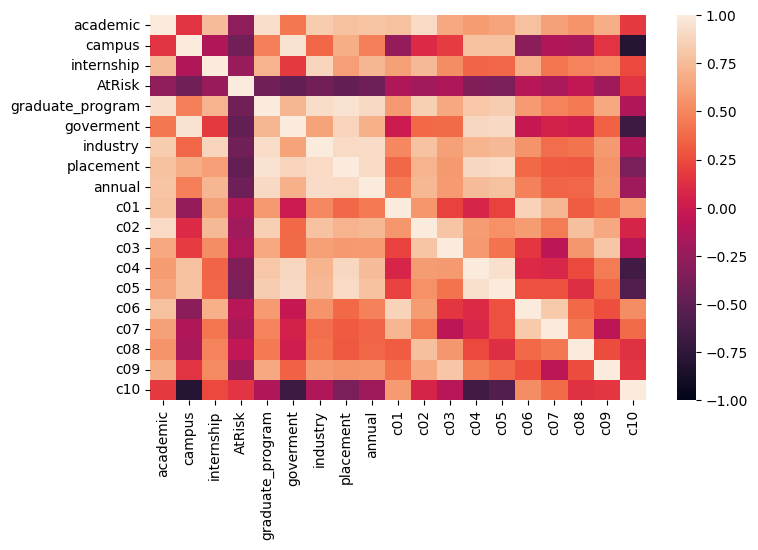

In [26]:
# or I can remove the annotations if they're too distracting (a bit 'cleaner' look)
fig = plt.figure(figsize=(8,5))
sns.heatmap(correlation,vmin=-1)

### Reasoning
Answer following questions using one or two sentences.
1.  Is there any difficulty you met in finishing this question? If yes, how did you solve it?
1.  Demostrate your understanding of *good* visualization by comparing a *good* plot with a *bad* plot for the same attribute. Explain why one is *good*, and why the other one is *bad*.

> Answer to 1: No particular difficulties, other than maybe deciding which visualizations to use (I LOVE playing around with visualizations, so I've had a lot of practice.)

> Answer to 2: 

## Question 5: Data Preprocessing (25 points)
You are now going to do further processing of your data to make it ready for analysis.

### Dealing with Missing Values
Are there missing values? Try to:
1.  Drop all rows with missing values and save the dataframe to `df_drop_na`. 
2.  Fill the missing course scores with the mean of the student and save the dataframe to `df_fill_stu_mean`
3.  Fill the missing course scores with the mean of the entire course and save the dataframe to `df_fill_course_mean`
4.  Fill the missing annual salary with an appropriate choice of yours and save the dataframe to `df_fill_annual`
5.  Choose an appropriate method of above, and save the missing value filled dataframe as `df_student_record_full` 

In [27]:
display(df_student_record.info())
df_student_record.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3000 non-null   object 
 1   name              3000 non-null   object 
 2   major             3000 non-null   object 
 3   gender            3000 non-null   object 
 4   academic          3000 non-null   float64
 5   campus            3000 non-null   int64  
 6   internship        3000 non-null   int64  
 7   AtRisk            3000 non-null   int64  
 8   graduate_program  3000 non-null   float64
 9   goverment         3000 non-null   float64
 10  industry          3000 non-null   float64
 11  placement         3000 non-null   float64
 12  annual            2852 non-null   float64
 13  c01               2841 non-null   float64
 14  c02               2848 non-null   float64
 15  c03               2864 non-null   float64
 16  c04               2861 non-null   float64


None

id                    0
name                  0
major                 0
gender                0
academic              0
campus                0
internship            0
AtRisk                0
graduate_program      0
goverment             0
industry              0
placement             0
annual              148
c01                 159
c02                 152
c03                 136
c04                 139
c05                 151
c06                 140
c07                 153
c08                 152
c09                 166
c10                 132
elective              0
dtype: int64

#### 1. Drop all rows w/ missing

In [28]:
# Drop all rows w/ missing
df_drop_na = df_student_record.dropna()
display(df_drop_na.head())
df_drop_na.info()

,id,name,major,gender,academic,campus,internship,AtRisk,graduate_program,goverment,...,c02,c03,c04,c05,c06,c07,c08,c09,c10,elective
1,CUB0001,Diana Lopez,Computer Science,M,178.45,4,13,1,0.623424,0.322178,...,156.0,124.0,161.0,220.0,217.0,149.0,132.0,177.0,222.0,['Data_Science_Methods' 'Deep_Learning' 'Stats...
3,CUB0003,Nicholas Steele,Information Science,M,176.25,17,16,0,0.769059,0.797730,...,161.0,166.0,209.0,254.0,168.0,117.0,134.0,201.0,159.0,['Python_for_Data_Science' 'Text_Marketing_Ana...
5,CUB0005,Troy Chen,Computer Science,M,156.05,6,9,0,0.345020,0.284101,...,138.0,113.0,135.0,184.0,173.0,136.0,128.0,148.0,197.0,['R_for_Data_Science' 'Neural_Networks' 'Data_...
6,CUB0006,Mrs. Caroline Rogers,Electric Engineering,F,171.45,5,13,0,0.549825,0.332821,...,161.0,148.0,159.0,185.0,187.0,134.0,151.0,177.0,207.0,['Statistical_Modeling' 'Data_Science_Methods'...
9,CUB0009,Teresa Hooper,Liberal Arts,M,166.45,21,9,0,0.645446,0.853131,...,147.0,122.0,188.0,252.0,185.0,135.0,121.0,159.0,159.0,['Statistical_Inference' 'Neural_Networks'\n '...


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1520 entries, 1 to 2999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1520 non-null   object 
 1   name              1520 non-null   object 
 2   major             1520 non-null   object 
 3   gender            1520 non-null   object 
 4   academic          1520 non-null   float64
 5   campus            1520 non-null   int64  
 6   internship        1520 non-null   int64  
 7   AtRisk            1520 non-null   int64  
 8   graduate_program  1520 non-null   float64
 9   goverment         1520 non-null   float64
 10  industry          1520 non-null   float64
 11  placement         1520 non-null   float64
 12  annual            1520 non-null   float64
 13  c01               1520 non-null   float64
 14  c02               1520 non-null   float64
 15  c03               1520 non-null   float64
 16  c04               1520 non-null   float64


#### 2. Fill missing course scores with mean of each student score

In [29]:
df_courses = df_student_record_courses.iloc[:,1:-1].apply(pd.to_numeric).reset_index(drop=True)
df_courses

,c01,c02,c03,c04,c05,c06,c07,c08,c09,c10
0,168.0,136.0,122.0,124.0,147.0,NaN,108.0,122.0,151.0,177.0
1,226.5,156.0,124.0,161.0,220.0,217.0,149.0,132.0,177.0,222.0
2,157.5,134.0,134.0,NaN,144.0,138.0,105.0,128.0,157.0,179.0
3,193.5,161.0,166.0,209.0,254.0,168.0,117.0,134.0,201.0,159.0
4,180.0,138.0,NaN,131.0,171.0,163.0,124.0,125.0,149.0,186.0
...,...,...,...,...,...,...,...,...,...,...
2995,211.5,160.0,NaN,190.0,249.0,192.0,142.0,145.0,168.0,163.0
2996,183.0,149.0,139.0,142.0,174.0,170.0,114.0,131.0,176.0,198.0
2997,202.5,151.0,NaN,178.0,236.0,169.0,136.0,139.0,158.0,152.0
2998,211.5,139.0,135.0,146.0,186.0,181.0,116.0,109.0,180.0,210.0


In [30]:
# mean of scores of each student
stud_mean = df_courses.mean(axis=1) 
stud_mean

0       139.444444
1       178.450000
2       141.833333
3       176.250000
4       151.888889
           ...    
2995    180.055556
2996    157.600000
2997    169.055556
2998    161.350000
2999    153.300000
Length: 3000, dtype: float64

In [31]:
# I don't think this is the best method, but it's the only way that I got to work
df_fill_stu_mean = df_courses.copy()
for i in range(len(df_courses)):
    row = df_courses.iloc[i]
    df_fill_stu_mean.iloc[i] = row.fillna(round(row.mean(),2))
    # I rounded to 100ths place to see where the values were filled easier
df_fill_stu_mean

,c01,c02,c03,c04,c05,c06,c07,c08,c09,c10
0,168.0,136.0,122.00,124.00,147.0,139.44,108.0,122.0,151.0,177.0
1,226.5,156.0,124.00,161.00,220.0,217.00,149.0,132.0,177.0,222.0
2,157.5,134.0,134.00,141.83,144.0,138.00,105.0,128.0,157.0,179.0
3,193.5,161.0,166.00,209.00,254.0,168.00,117.0,134.0,201.0,159.0
4,180.0,138.0,151.89,131.00,171.0,163.00,124.0,125.0,149.0,186.0
...,...,...,...,...,...,...,...,...,...,...
2995,211.5,160.0,180.06,190.00,249.0,192.00,142.0,145.0,168.0,163.0
2996,183.0,149.0,139.00,142.00,174.0,170.00,114.0,131.0,176.0,198.0
2997,202.5,151.0,169.06,178.00,236.0,169.00,136.0,139.0,158.0,152.0
2998,211.5,139.0,135.00,146.00,186.0,181.00,116.0,109.0,180.0,210.0


#### 3. Fill missing course scores with mean of entire course

In [32]:
df_courses.mean(axis=0)

c01    200.346885
c02    146.357444
c03    128.698324
c04    157.319119
c05    200.484380
c06    175.811888
c07    126.174570
c08    126.252809
c09    170.005999
c10    188.690028
dtype: float64

In [33]:
# I rounded to 100ths place to see where the values were filled easier
df_fill_course_mean = df_courses.fillna(round(df_courses.mean(axis=0),2)) 
df_fill_course_mean

,c01,c02,c03,c04,c05,c06,c07,c08,c09,c10
0,168.0,136.0,122.0,124.00,147.0,175.81,108.0,122.0,151.0,177.0
1,226.5,156.0,124.0,161.00,220.0,217.00,149.0,132.0,177.0,222.0
2,157.5,134.0,134.0,157.32,144.0,138.00,105.0,128.0,157.0,179.0
3,193.5,161.0,166.0,209.00,254.0,168.00,117.0,134.0,201.0,159.0
4,180.0,138.0,128.7,131.00,171.0,163.00,124.0,125.0,149.0,186.0
...,...,...,...,...,...,...,...,...,...,...
2995,211.5,160.0,128.7,190.00,249.0,192.00,142.0,145.0,168.0,163.0
2996,183.0,149.0,139.0,142.00,174.0,170.00,114.0,131.0,176.0,198.0
2997,202.5,151.0,128.7,178.00,236.0,169.00,136.0,139.0,158.0,152.0
2998,211.5,139.0,135.0,146.00,186.0,181.00,116.0,109.0,180.0,210.0


#### 4. Fill missing annual salary w/ appropriate choice of yours

In [34]:
df_fill_annual = df_student_record[['annual']].fillna(df_student_record['annual'].mean())
df_fill_annual

,annual
0,44384.842252
1,136786.533445
2,140886.637437
3,243255.134630
4,51483.725756
...,...
2995,140886.637437
2996,145951.154752
2997,141435.622842
2998,123132.874432


#### 5. Choose appropriate method, and save missing filled dataframe

In [35]:
course_col = ['c0{}'.format(i) for i in range(1,10)] + ['c10']
course_col

['c01', 'c02', 'c03', 'c04', 'c05', 'c06', 'c07', 'c08', 'c09', 'c10']

In [36]:
df_student_record_full = df_student_record.copy()
df_student_record_full['annual'] = df_fill_annual
df_student_record_full[course_col] = df_fill_stu_mean

display(df_student_record_full.isna().sum())
df_student_record_full.head()

id                  0
name                0
major               0
gender              0
academic            0
campus              0
internship          0
AtRisk              0
graduate_program    0
goverment           0
industry            0
placement           0
annual              0
c01                 0
c02                 0
c03                 0
c04                 0
c05                 0
c06                 0
c07                 0
c08                 0
c09                 0
c10                 0
elective            0
dtype: int64

,id,name,major,gender,academic,campus,internship,AtRisk,graduate_program,goverment,...,c02,c03,c04,c05,c06,c07,c08,c09,c10,elective
0,CUB0000,Lisa Tucker,Electric Engineering,M,140.40,4,4,1,0.095158,0.120676,...,136.0,122.00,124.00,147.0,139.44,108.0,122.0,151.0,177.0,['Statistical_Modeling' 'Data_Mining' 'Stats_f...
1,CUB0001,Diana Lopez,Computer Science,M,178.45,4,13,1,0.623424,0.322178,...,156.0,124.00,161.00,220.0,217.00,149.0,132.0,177.0,222.0,['Data_Science_Methods' 'Deep_Learning' 'Stats...
2,CUB0002,Angela Huber,Electric Engineering,M,140.15,2,6,1,0.083423,0.063620,...,134.0,134.00,141.83,144.0,138.00,105.0,128.0,157.0,179.0,['Data_Mining' 'Datacenter_Computing' 'Databas...
3,CUB0003,Nicholas Steele,Information Science,M,176.25,17,16,0,0.769059,0.797730,...,161.0,166.00,209.00,254.0,168.00,117.0,134.0,201.0,159.0,['Python_for_Data_Science' 'Text_Marketing_Ana...
4,CUB0004,Deborah Porter,Computer Science,M,148.50,7,2,1,0.214019,0.241057,...,138.0,151.89,131.00,171.0,163.00,124.0,125.0,149.0,186.0,['Statistical_Learning' 'Statistical_Inference...


### Dealing with Outliers
Continue with `df_student_record_full` and try to:
1.  Use box plot to detect possible outliers.
1.  Use IQR to detect possible outliers of all attributes, and create a column `Outlier`, in which if a record contains any attributes are possible outliers, it is `Abnormal`, otherwise `Normal`.
1.  Drop all abnormal records, and save it as `df_student_record_n`, and use box plot to verify there is no more outliers. You will NOT use `df_student_record_n` for further process. It is just for this step.

#### 1. Boxplots to detect possible outliers

In [37]:
df_student_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3000 non-null   object 
 1   name              3000 non-null   object 
 2   major             3000 non-null   object 
 3   gender            3000 non-null   object 
 4   academic          3000 non-null   float64
 5   campus            3000 non-null   int64  
 6   internship        3000 non-null   int64  
 7   AtRisk            3000 non-null   int64  
 8   graduate_program  3000 non-null   float64
 9   goverment         3000 non-null   float64
 10  industry          3000 non-null   float64
 11  placement         3000 non-null   float64
 12  annual            2852 non-null   float64
 13  c01               2841 non-null   float64
 14  c02               2848 non-null   float64
 15  c03               2864 non-null   float64
 16  c04               2861 non-null   float64


<AxesSubplot: >

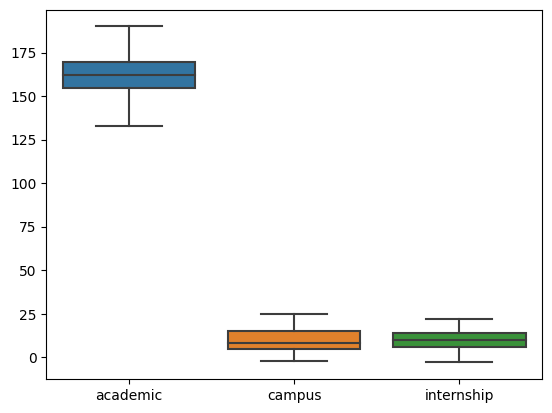

In [38]:
sns.boxplot(data = df_student_record_full[['academic','campus','internship']])

<AxesSubplot: >

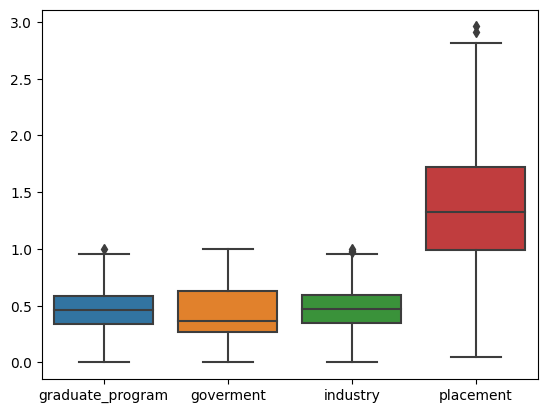

In [39]:
sns.boxplot(data = df_student_record_full.loc[:,'graduate_program':'placement'])

Text(0.5, 1.0, 'annual')

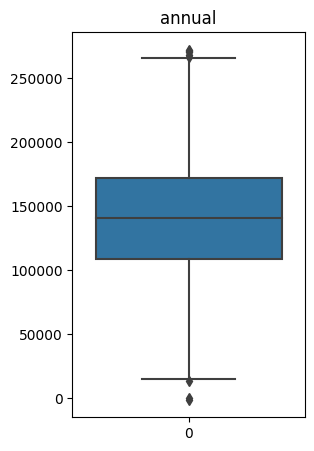

In [40]:
fig = plt.figure(figsize=(3,5))
sns.boxplot(data = df_student_record_full['annual'])
plt.title('annual')

<AxesSubplot: >

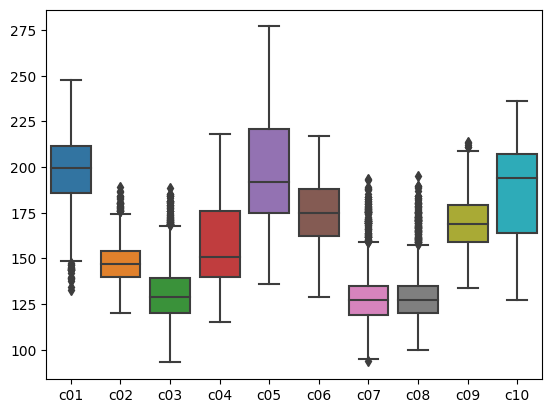

In [41]:
sns.boxplot(data = df_student_record_full[course_col])

#### 2. Use IQR to detect possible outliers & create "Outlier" column (w/ attributes 'Abnormal' and 'Normal')

In [42]:
df_student_record_full.quantile([0.25,0.75])

,academic,campus,internship,AtRisk,graduate_program,goverment,industry,placement,annual,c01,c02,c03,c04,c05,c06,c07,c08,c09,c10
0.25,154.6375,5.0,6.0,0.0,0.334574,0.264442,0.342461,0.985791,109086.287333,186.0,140.0,120.00,140.0,175.0,162.0,119.0,120.0,159.0,164.0
0.75,169.7500,15.0,14.0,1.0,0.583821,0.632029,0.591504,1.722700,172266.927283,211.5,154.0,139.25,176.0,221.0,188.0,135.0,135.0,179.0,207.0


In [43]:
df_student_record_full.head()

,id,name,major,gender,academic,campus,internship,AtRisk,graduate_program,goverment,...,c02,c03,c04,c05,c06,c07,c08,c09,c10,elective
0,CUB0000,Lisa Tucker,Electric Engineering,M,140.40,4,4,1,0.095158,0.120676,...,136.0,122.00,124.00,147.0,139.44,108.0,122.0,151.0,177.0,['Statistical_Modeling' 'Data_Mining' 'Stats_f...
1,CUB0001,Diana Lopez,Computer Science,M,178.45,4,13,1,0.623424,0.322178,...,156.0,124.00,161.00,220.0,217.00,149.0,132.0,177.0,222.0,['Data_Science_Methods' 'Deep_Learning' 'Stats...
2,CUB0002,Angela Huber,Electric Engineering,M,140.15,2,6,1,0.083423,0.063620,...,134.0,134.00,141.83,144.0,138.00,105.0,128.0,157.0,179.0,['Data_Mining' 'Datacenter_Computing' 'Databas...
3,CUB0003,Nicholas Steele,Information Science,M,176.25,17,16,0,0.769059,0.797730,...,161.0,166.00,209.00,254.0,168.00,117.0,134.0,201.0,159.0,['Python_for_Data_Science' 'Text_Marketing_Ana...
4,CUB0004,Deborah Porter,Computer Science,M,148.50,7,2,1,0.214019,0.241057,...,138.0,151.89,131.00,171.0,163.00,124.0,125.0,149.0,186.0,['Statistical_Learning' 'Statistical_Inference...


In [44]:
df_student_record_full.iloc[:,4:23] > df_student_record_full.quantile(0.75)

,academic,campus,internship,AtRisk,graduate_program,goverment,industry,placement,annual,c01,c02,c03,c04,c05,c06,c07,c08,c09,c10
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,True,False,False,False,False,True,True,False,False,False,True,True,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,True,True,False,True,True,True,True,True,False,True,True,True,True,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,True,False,False,False,True,False,False,True,False,False,True,True,True,True,True,True,True,False,False
2996,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2997,False,True,False,False,False,True,False,False,False,False,False,True,True,True,False,True,True,False,False
2998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True


In [45]:
df_student_record_full.iloc[:,4:23] < df_student_record_full.quantile(0.25)

,academic,campus,internship,AtRisk,graduate_program,goverment,industry,placement,annual,c01,c02,c03,c04,c05,c06,c07,c08,c09,c10
0,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,True,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,True,True,True,True,False,True,True,False,False,True,True,True,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
4,True,False,True,False,True,True,True,True,True,True,True,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2996,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False
2997,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
2998,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True,False,False


In [46]:
conditions = [
    (df_student_record_full.iloc[:,4:23] > df_student_record_full.quantile(0.75)),
    (df_student_record_full.iloc[:,4:23] < df_student_record_full.quantile(0.25)),
]

values = ['Abnormal','Abnormal']

np.select(conditions,values,default='Normal')

array([['Abnormal', 'Abnormal', 'Abnormal', ..., 'Normal', 'Abnormal',
        'Normal'],
       ['Abnormal', 'Abnormal', 'Normal', ..., 'Normal', 'Normal',
        'Abnormal'],
       ['Abnormal', 'Abnormal', 'Normal', ..., 'Normal', 'Abnormal',
        'Normal'],
       ...,
       ['Normal', 'Abnormal', 'Abnormal', ..., 'Abnormal', 'Abnormal',
        'Abnormal'],
       ['Normal', 'Abnormal', 'Normal', ..., 'Abnormal', 'Abnormal',
        'Abnormal'],
       ['Abnormal', 'Abnormal', 'Normal', ..., 'Abnormal', 'Normal',
        'Normal']], dtype='<U8')

### Dealing with Scales
Continue with `df_student_record_full`. Are there inconsistancy of the scaling? Try to:
1.   Convert all course scores using min-max normalization with `min = 0` and `max = 100`
1.   Convert all course scores using Z-score
1.   Convert all course scores using decimal scaling
1.   Convert the annual salary using min-max normalization with `min = 0` and `max = 100`
1.   Convert the annual salary using Z-score
1.   Convert the annual salary using decimal scaling
1.   Choose the appropriate normalization method for above attributes, and save your dataframe as `df_student_record_full_normal`

In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [48]:
df_full_courses = df_student_record_full[course_col]
df_full_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   c01     3000 non-null   float64
 1   c02     3000 non-null   float64
 2   c03     3000 non-null   float64
 3   c04     3000 non-null   float64
 4   c05     3000 non-null   float64
 5   c06     3000 non-null   float64
 6   c07     3000 non-null   float64
 7   c08     3000 non-null   float64
 8   c09     3000 non-null   float64
 9   c10     3000 non-null   float64
dtypes: float64(10)
memory usage: 234.5 KB


#### 1. Convert all course scores using min-max normalization (min=0,max=100)

In [50]:
mmscale = MinMaxScaler((0.0,100.0))

courses_full_mm_scale = pd.DataFrame(mmscale.fit_transform(df_full_courses),columns=df_full_courses.columns)
courses_full_mm_scale.describe()

,c01,c02,c03,c04,c05,c06,c07,c08,c09,c10
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,57.049988,39.492957,39.203684,41.299929,44.336594,52.318561,34.302654,29.751316,44.429975,55.403872
std,16.290379,15.118273,16.243707,22.282691,21.730744,20.278240,13.809971,14.220561,17.823627,23.225969
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.493823,28.985507,28.337531,24.271845,27.802945,37.500000,25.070197,21.003991,31.344401,33.944954
50%,58.239081,39.130435,37.783375,34.951456,39.835787,52.272727,33.092659,28.355388,43.827238,61.467890
75%,68.679311,49.275362,48.541142,59.223301,60.362401,67.045455,41.115122,36.756984,56.310074,73.394495
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


#### 2. Convert all course scores using Z-score normalization

In [51]:
znorm = StandardScaler()

courses_full_zscale = pd.DataFrame(znorm.fit_transform(df_full_courses),columns=df_full_courses.columns)
courses_full_zscale.describe()

,c01,c02,c03,c04,c05,c06,c07,c08,c09,c10
count,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03
mean,-8.218611e-16,-1.537141e-15,1.252924e-15,-9.000208e-17,5.494864e-16,-1.752672e-16,5.897505e-16,-4.476419e-16,-3.386920e-16,1.132724e-15
std,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00
min,-3.502650e+00,-2.612702e+00,-2.413871e+00,-1.853762e+00,-2.040611e+00,-2.580465e+00,-2.484319e+00,-2.092483e+00,-2.493173e+00,-2.385825e+00
25%,-6.481080e-01,-6.951324e-01,-6.690569e-01,-7.643118e-01,-7.609682e-01,-7.308835e-01,-6.686471e-01,-6.152207e-01,-7.342925e-01,-9.240732e-01
50%,7.300574e-02,-2.398304e-02,-8.745204e-02,-2.849535e-01,-2.071516e-01,-2.260599e-03,-8.763207e-02,-9.817907e-02,-3.382243e-02,2.611314e-01
75%,7.139957e-01,6.471663e-01,5.749312e-01,8.044971e-01,7.375946e-01,7.263623e-01,4.933829e-01,4.927257e-01,6.666476e-01,7.747200e-01
max,2.636966e+00,4.002913e+00,3.743385e+00,2.634774e+00,2.561932e+00,2.351752e+00,4.758033e+00,4.940761e+00,3.118293e+00,1.920418e+00


#### 3. Convert all course scores using decimal scaling

In [54]:
df_full_courses.max()

c01    247.50
c02    189.00
c03    188.28
c04    218.00
c05    277.00
c06    217.00
c07    193.72
c08    195.22
c09    214.00
c10    236.00
dtype: float64

So all course score maximum values have order of magnitude of 2 (i.e. are in the hundreds) and decimal scaling works as follows

$v' = \frac{v}{10^j}$   where $j$ is the smallest integer, such that `max(|v'|)`$<1$

thus, in this case, $j=3$.

In [59]:
courses_full_decscale = df_full_courses/(10**3)
courses_full_decscale.describe()

,c01,c02,c03,c04,c05,c06,c07,c08,c09,c10
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.198133,0.147250,0.130353,0.157539,0.198359,0.175040,0.128207,0.128329,0.169483,0.187390
std,0.018724,0.010432,0.015477,0.022951,0.030701,0.017845,0.013771,0.013541,0.014279,0.025316
min,0.132560,0.120000,0.093000,0.115000,0.135720,0.129000,0.094000,0.100000,0.133890,0.127000
25%,0.186000,0.140000,0.120000,0.140000,0.175000,0.162000,0.119000,0.120000,0.159000,0.164000
50%,0.199500,0.147000,0.129000,0.151000,0.192000,0.175000,0.127000,0.127000,0.169000,0.194000
75%,0.211500,0.154000,0.139250,0.176000,0.221000,0.188000,0.135000,0.135000,0.179000,0.207000
max,0.247500,0.189000,0.188280,0.218000,0.277000,0.217000,0.193720,0.195220,0.214000,0.236000


#### 4. Convert the annual salary using min-max normalization (min=0, max=100)

In [61]:
mmscale = MinMaxScaler((0.0,100.0))
annual_df_full = df_student_record_full[['annual']]

annual_mm_scale = pd.DataFrame(mmscale.fit_transform(annual_df_full),columns=['annual'])
annual_mm_scale.describe()

,annual
count,3000.000000
mean,51.943021
std,17.118583
min,0.000000
25%,40.323574
50%,51.943021
75%,63.408985
max,100.000000


#### 5. Convert annual salary using Z-score

In [62]:
znorm = StandardScaler()

annual_zscale = pd.DataFrame(znorm.fit_transform(annual_df_full),columns=['annual'])
annual_zscale.describe()

,annual
count,3.000000e+03
mean,1.657933e-17
std,1.000167e+00
min,-3.034812e+00
25%,-6.788754e-01
50%,0.000000e+00
75%,6.699079e-01
max,2.807767e+00


#### 6. Convert annual salary using decimal scaling

In [63]:
annual_df_full.max()

annual    272409.990797
dtype: float64

So the annual salary maximum value has an order of magnitude of 5 (i.e. are in the hundred-thousands) and decimal scaling works as follows

$v' = \frac{v}{10^j}$   where $j$ is the smallest integer, such that `max(|v'|)`$<1$

thus, in this case, $j=6$.

In [64]:
annual_decscale = annual_df_full/(10**6)
annual_decscale.describe()

,annual
count,3000.000000
mean,0.140887
std,0.046850
min,-0.001272
25%,0.109086
50%,0.140887
75%,0.172267
max,0.272410


#### 7. Choose appropriate normalization method for above attributes and save dataframe

In [65]:
# course scores = min-max scale
# annual salary = z-score

df_student_record_full_normal = df_student_record_full.copy()
df_student_record_full_normal[course_col] = courses_full_mm_scale
df_student_record_full_normal['annual'] = annual_zscale

df_student_record_full_normal.describe()

,academic,campus,internship,AtRisk,graduate_program,goverment,industry,placement,annual,c01,c02,c03,c04,c05,c06,c07,c08,c09,c10
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,161.981400,9.452333,9.569000,0.324333,0.461342,0.431822,0.470863,1.364027,1.657933e-17,57.049988,39.492957,39.203684,41.299929,44.336594,52.318561,34.302654,29.751316,44.429975,55.403872
std,10.365338,6.021778,5.340794,0.490464,0.177539,0.225588,0.176013,0.528017,1.000167e+00,16.290379,15.118273,16.243707,22.282691,21.730744,20.278240,13.809971,14.220561,17.823627,23.225969
min,133.050000,-2.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.043074,-3.034812e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154.637500,5.000000,6.000000,0.000000,0.334574,0.264442,0.342461,0.985791,-6.788754e-01,46.493823,28.985507,28.337531,24.271845,27.802945,37.500000,25.070197,21.003991,31.344401,33.944954
50%,161.850000,8.000000,10.000000,0.000000,0.460607,0.360048,0.472252,1.327008,0.000000e+00,58.239081,39.130435,37.783375,34.951456,39.835787,52.272727,33.092659,28.355388,43.827238,61.467890
75%,169.750000,15.000000,14.000000,1.000000,0.583821,0.632029,0.591504,1.722700,6.699079e-01,68.679311,49.275362,48.541142,59.223301,60.362401,67.045455,41.115122,36.756984,56.310074,73.394495
max,189.950000,25.000000,22.000000,2.000000,1.000000,1.000000,1.000000,2.960918,2.807767e+00,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


### Dealing with Continuous Data
Continue with `df_student_record_full_normal` and try to:
1. Use Histogram to discretize annual salary
1. Use Partitioning to discretize annual salary
1. Choose one method above, and save the descretized dataframe as `df_student_record_full_normal_discretized`

### Dealing with Text (OPTIONAL)
Continue with `df_student_record_full_normal_discretized`. The attribute `elective` is a list of elective courses. However, they are not in a proper format of text. You should convert the value to a proper list of courses, so we can do further analysis.

For example, when you convert the elective column to a list `electives` and print `electives[:1]`, it might be like:
`["['Statistical_Modeling' 'Data_Mining' 'Stats_for_Data_Science'\n 'Data_Structures_and_Algorithms' 'Effective_Communication'\n 'Datacenter_Computing' 'Statistical_Learning' 'Data_Science_Methods'\n 'Python_for_Data_Science' 'Machine_Learning']"]`

You should convert it to be like:
`[['Databases',
  'Statistical_Inference',
  'High_Performance_and_Parallel_Computing',
  'Statistical_Learning',
  'Big_Data',
  'Effective_Communication',
  'Statistical_Modeling',
  'Machine_Learning',
  'R_for_Data_Science',
  'Nature_Language_Processing']]`

Now, save your dataframe to `df_student_record_preprocessed`.

### Save the Processed Data
Now save your data as a csv file with name `Student_Record_Processed.csv` without index.

In [ ]:
# I skipped the 'Dealing with Text' part so I'll just save the normalized and discretized dataframe.
df_student_record_full_normal_discretized.to_csv(index=False)

### Reasoning
Answer following questions using one or two sentences.
1.  Is there any difficulty you met in finishing this question? If yes, how did you solve it?
1.  I believe now you are an expert of data wrangling. What are the most important lesson you learned so far and how do you think you will benefit from it?

## Question 6: Survey (5 points)

### Topic of your choice

*   List ONE topic that you prepared but not in this exam (if everything you prepared is in the exam, just pick ONE topic you think most important).
*   Why you think this topic is important?
*   What question you will make to test this topic? 
*   How would you answer the question above?

### Exam 1

*   How do you feel about this exam?
*   How shall we improve it?

### Assignments

*   How do you feel about our assignments so far?
*   How shall we improve it?

### Mini Projects

*   How do you feel about our mini projects so far?
*   How shall we improve it?

### Data Mining

*   How do you feel about our class so far?
*   What should be improved for the next part of the semester?


#### Jasmine's Answers to Survey Questions

##### Topic of Choice
... (haven't thought of something yet) ...

##### Exam1
I think this exam was reasonably and well-built given that we had a full week to complete and covered most of the valuable aspects of what we've learned so far. 

One thing I would like to point out is that I'm just a little concerned about the length of the exam all in one DeepNote notebook.Things like making sure that everything will showup in the final pdf was one concern. And the loading time greatly slowed down for me as I progressed through the exam (using only one DeepNote notebook for the whole exam). I understand why everything was contained in one notebook as each part was reliant upon the previous part, and I don't have any specific suggestions to get around to containing the exam to multiple notebooks, but I think it's just still worth mentioning to consider in the future. 

##### Assignments
Aye, they are a lot of work! But I guess, that makes them just-right as they are. 
I wouldn't be lying if I said I wish they were a little less time consuming (but that's just preference haha); however, on the other hand, I do believe that this is probably the amount of work I would anticipate from a graduate-level course. (I just may have overloaded myself a bit by taking three 3-credit courses this semester... but that's just my bad)

I think the goal to make them challenging has definitely been met. (Please don't make them any more challenging from what we've seen so far!(haha))

##### Mini Projects
So far, I like the mini-projects. I mainly like the ones that are the DataCamp Projects that give us step-by-step instructions of what to do and what they want. They are a lot easier to complete that way (which is a nice break from the time-consumin g main-assignments), but not only that I managed to benefit a lot from them. They forced to me to practice things I haven't used as much before, and I could occasionally use the finished/saved notebooks as reference for useful things in the main-assignments. 

I, personally, would prefer that they continue to be the DataCamp Projects that give us so that they remain to be the "simple" contrast to the main-assignments. 

##### Data Mining
Overall, I would say I like the class as it is right now. As mentioned, it definitely is a lot of work, but I also think that it may be a reasonable amount of work for a graduate-level course in my opinion. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4a92ce0d-8376-4d2a-ad02-c3386047fdc2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>